## Mapping random effects obtained from lme4

This notebook shows how to map the random effects using the outputs in R.



In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [3]:
size=4

In [64]:
def plot_1(b,title='',vmin=None,vmax=None):
    plt.imshow(b.reshape(size,size),cmap=plt.cm.get_cmap('RdBu_r',5),vmin=vmin,vmax=vmax)
    plt.title(title)
    plt.colorbar()
    
def plot_s(b,sub_title=['','','',''],vmin=None,vmax=None, cmap=plt.cm.get_cmap('viridis',21)):
    k = len(b)
    fig, axs = plt.subplots(1, k,figsize=(6*k,4))
    for i in range(k):

        ax = axs[i].imshow(b[i].reshape(size,size),cmap,vmin=vmin,vmax=vmax)
        axs[i].set_title(sub_title[i],fontsize=16)
        fig.colorbar(ax, ax=axs[i])
        
        axs[i].set_xticks(np.arange(-0.5, size, 1))
        axs[i].set_yticks(np.arange(-0.5, size, 1))
        
        #axs[i].set_xticklabels([])
        #axs[i].set_yticklabels([])
        
        #axs[i].tick_params(axis='x', colors=(0,0,0,0))
        #axs[i].tick_params(axis='y', colors=(0,0,0,0))
        
        axs[i].grid(color='black', linewidth=0.5)
        

    #fig.suptitle(title, fontsize=16)

In [66]:
np.arange(-0.5, size, 1)

array([-0.5,  0.5,  1.5,  2.5,  3.5])

In [26]:
true = pd.read_csv("Simulation/sim_data_small_1102.csv")

In [27]:
def shrink(data, rows, cols):
    return data.reshape(rows, int(data.shape[0]/rows), cols, int(data.shape[1]/cols)).mean(axis=1).mean(axis=2)

### Reading in the random effects

In [28]:
size=4
re = pd.read_csv("MLM/re.csv")
fe = pd.read_csv("MLM/fe.csv")

In [29]:
re.iloc[:,1:] = re.iloc[:,1:] + fe.iloc[:,1:].values

Re-name the columns

In [30]:
re.columns = ['id','Intercept','beta1','beta2']

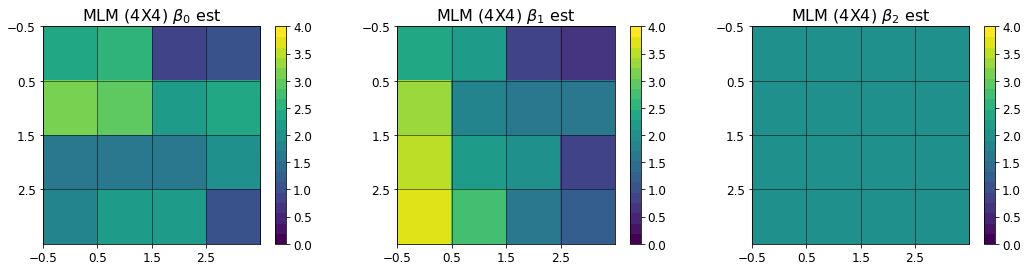

In [65]:
plot_s(re.iloc[:,1:].values.T,sub_title=[r'MLM (4X4) $\beta_0$ est',r'MLM (4X4) $\beta_1$ est',
                                         r'MLM (4X4) $\beta_2$ est'],vmin=0,vmax=4)

plt.savefig("MLM est 4 by 4.png",dpi=300)

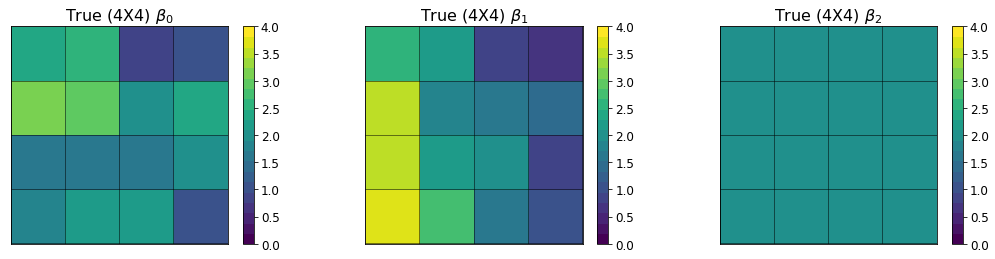

In [15]:
plot_s([shrink(true.b0.values.reshape(40,40),4,4).reshape(-1),
 shrink(true.b1.values.reshape(40,40),4,4).reshape(-1),
 shrink(true.b2.values.reshape(40,40),4,4).reshape(-1)],sub_title=[r'True (4X4) $\beta_0$',
                                           r'True (4X4) $\beta_1$',
                                           r'True (4X4) $\beta_2$'],vmin=0,vmax=4)

#plt.savefig("MLM est 4 by 4.png",dpi=300)


In [16]:
print(np.std(shrink(true.b0.values.reshape(40,40),4,4) - re.iloc[:,1:].values[:,0].reshape(4,4)))
print(np.std(shrink(true.b1.values.reshape(40,40),4,4) - re.iloc[:,1:].values[:,1].reshape(4,4)))
print(np.std(shrink(true.b2.values.reshape(40,40),4,4) - re.iloc[:,1:].values[:,2].reshape(4,4)))

0.04066115450574204
0.07713497771019008
0.03860099297339436


In [ ]:
plot_s(re.iloc[:,1:].values.T*100000,sub_title=['4 X 4','b1 est','b2 est'],vmin=0,vmax=4,cmap="hot")
plt.savefig('4 4 grid.png',dpi=300)

In [20]:
est_b0 = re.iloc[:,1:].values[:,0].reshape(4,4).repeat(10, axis = 0).repeat(10, axis = 1).reshape(-1)
est_b1 = re.iloc[:,1:].values[:,1].reshape(4,4).repeat(10, axis = 0).repeat(10, axis = 1).reshape(-1)
est_b2 = re.iloc[:,1:].values[:,2].reshape(4,4).repeat(10, axis = 0).repeat(10, axis = 1).reshape(-1)


In [21]:
print("MLM b0 est - b0:", np.round(np.mean(est_b0 - true.b0),2))
print("MLM b1 est - b1:", np.round(np.mean(est_b1 - true.b1),2))
print("MLM b2 est - b2:", np.round(np.mean(est_b2 - true.b2),2))

MLM b0 est - b0: -0.02
MLM b1 est - b1: -0.01
MLM b2 est - b2: 0.0


In [22]:
from sklearn.metrics import mean_squared_error

print("MLM b0 est - b0:", np.round(np.std(est_b0 - true.b0),2))
print("MLM b1 est - b1:", np.round(np.std(est_b1 - true.b1),2))
print("MLM b2 est - b2:", np.round(np.std(est_b2 - true.b2),2))

MLM b0 est - b0: 0.77
MLM b1 est - b1: 0.38
MLM b2 est - b2: 0.04


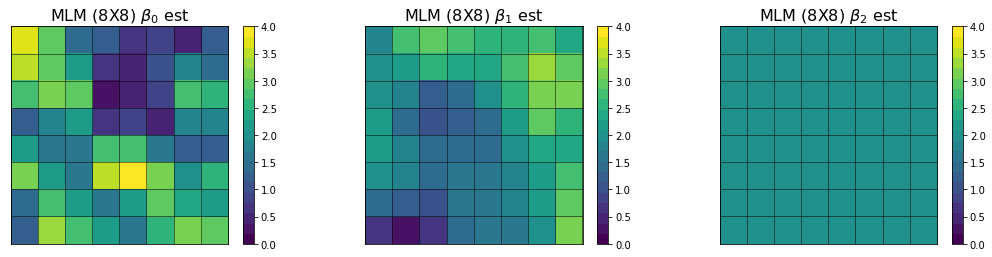

In [61]:
size=8
re_s = pd.read_csv("MLM/re_small.csv")
fe_s = pd.read_csv("MLM/fe_small.csv")

re_s.iloc[:,1:] = re_s.iloc[:,1:] + fe_s.iloc[:,1:].values

re_s.columns = ['id','Intercept','beta1','beta2']

plot_s(re_s.iloc[:,1:].values.T,sub_title=[r'MLM (8X8) $\beta_0$ est',r'MLM (8X8) $\beta_1$ est',
                                           r'MLM (8X8) $\beta_2$ est'],vmin=0,vmax=4)

plt.savefig("MLM est 8 by 8.png",dpi=300)

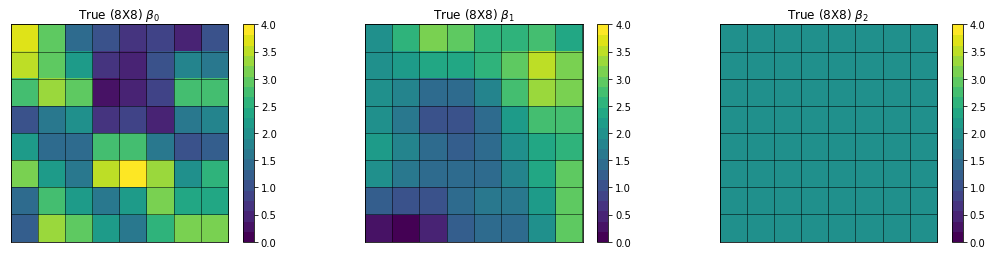

In [333]:
plot_s([shrink(true.b0.values.reshape(40,40),8,8).reshape(-1),
 shrink(true.b1.values.reshape(40,40),8,8).reshape(-1),
 shrink(true.b2.values.reshape(40,40),8,8).reshape(-1)],sub_title=[r'True (8X8) $\beta_0$',
                                           r'True (8X8) $\beta_1$',
                                           r'True (8X8) $\beta_2$'],vmin=0,vmax=4)




In [334]:
print(np.mean(shrink(true.b0.values.reshape(40,40),8,8) - re_s.iloc[:,1:].values[:,0].reshape(8,8)))
print(np.mean(shrink(true.b1.values.reshape(40,40),8,8) - re_s.iloc[:,1:].values[:,1].reshape(8,8)))
print(np.mean(shrink(true.b2.values.reshape(40,40),8,8) - re_s.iloc[:,1:].values[:,2].reshape(8,8)))

print(np.std(shrink(true.b0.values.reshape(40,40),8,8) - re_s.iloc[:,1:].values[:,0].reshape(8,8)))
print(np.std(shrink(true.b1.values.reshape(40,40),8,8) - re_s.iloc[:,1:].values[:,1].reshape(8,8)))
print(np.std(shrink(true.b2.values.reshape(40,40),8,8) - re_s.iloc[:,1:].values[:,2].reshape(8,8)))

-0.0017459000609366627
-0.015096644799989914
-0.01578622834991048
0.06469577043070457
0.13154510421488871
0.018963468054893986


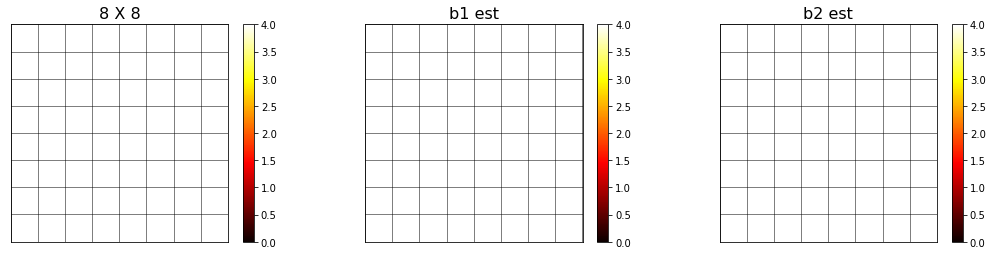

In [62]:
plot_s(re_s.iloc[:,1:].values.T*100000,sub_title=['8 X 8','b1 est','b2 est'],vmin=0,vmax=4,cmap="hot")

plt.savefig('8 8 grid.png',dpi=300)

In [219]:
est_b0_s = re_s.iloc[:,1:].values[:,0].reshape(8,8).repeat(5, axis = 0).repeat(5, axis = 1).reshape(-1)
est_b1_s = re_s.iloc[:,1:].values[:,1].reshape(8,8).repeat(5, axis = 0).repeat(5, axis = 1).reshape(-1)
est_b2_s = re_s.iloc[:,1:].values[:,2].reshape(8,8).repeat(5, axis = 0).repeat(5, axis = 1).reshape(-1)


In [220]:
print("MLM b0 est - b0:", np.mean(est_b0_s - true.b0))
print("MLM b1 est - b1:", np.mean(est_b1_s - true.b1))
print("MLM b2 est - b2:", np.mean(est_b2_s - true.b2))

MLM b0 est - b0: 0.001745900060936652
MLM b1 est - b1: 0.015096644799989845
MLM b2 est - b2: 0.015786228349910433


In [ ]:
plot_2s([np.array(mlm_resid).mean(axis=1), np.array(mlm_resid_s)[:,2]],vmin=-2,vmax=2)

In [235]:
print("MLM b0 est - b0:", np.std(est_b0_s - true.b0))
print("MLM b1 est - b1:", np.std(est_b1_s - true.b1))
print("MLM b2 est - b2:", np.std(est_b2_s - true.b2))

MLM b0 est - b0: 0.47135731375445206
MLM b1 est - b1: 0.23120785835243524
MLM b2 est - b2: 0.018963468054894038


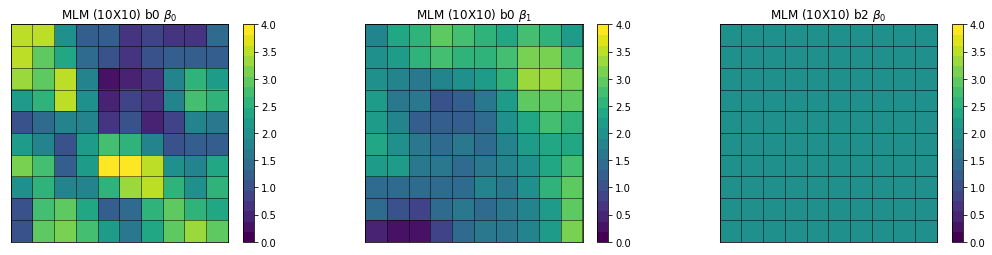

In [261]:
size=10
re_s = pd.read_csv("re_smallest.csv")
fe_s = pd.read_csv("fe_smallest.csv")

re_s.iloc[:,1:] = re_s.iloc[:,1:] + fe_s.iloc[:,1:].values

re_s.columns = ['id','Intercept','beta1','beta2']

plot_s(re_s.iloc[:,1:].values.T,sub_title=[r'MLM (10X10) $\beta_0$',
                                           r'MLM (10X10) $\beta_1$',r'MLM (10X10) $\beta_0$'],vmin=0,vmax=4)

In [258]:
est_b0_s = re_s.iloc[:,1:].values[:,0].reshape(size,size).repeat(40/size, axis = 0).repeat(40/size, axis = 1).reshape(-1)
est_b1_s = re_s.iloc[:,1:].values[:,1].reshape(size,size).repeat(40/size, axis = 0).repeat(40/size, axis = 1).reshape(-1)
est_b2_s = re_s.iloc[:,1:].values[:,2].reshape(size,size).repeat(40/size, axis = 0).repeat(40/size, axis = 1).reshape(-1)


In [259]:
print("MLM b0 est - b0:", np.mean(est_b0_s - true.b0))
print("MLM b1 est - b1:", np.mean(est_b1_s - true.b1))
print("MLM b2 est - b2:", np.mean(est_b2_s - true.b2))

MLM b0 est - b0: 0.006975650905833054
MLM b1 est - b1: 0.010992801996314115
MLM b2 est - b2: -0.0033315731475596997


In [260]:
print("MLM b0 est - b0:", np.std(est_b0_s - true.b0))
print("MLM b1 est - b1:", np.std(est_b1_s - true.b1))
print("MLM b2 est - b2:", np.std(est_b2_s - true.b2))

MLM b0 est - b0: 0.4078653336124828
MLM b1 est - b1: 0.20805298040226214
MLM b2 est - b2: 0.010128890369834415


In [46]:
mlm_resid = pd.read_csv("full_res.csv").values
mlm_resid_s = pd.read_csv("full_res_s.csv").values

In [47]:
size=40
u = np.array([np.linspace(0,size-1,num=size)]*size).reshape(-1)
v = np.array([np.linspace(0,size-1,num=size)]*size).T.reshape(-1)
coords = list(zip(u,v))
df = pd.DataFrame(coords,columns=['x','y'])
gdf = gpd.GeoDataFrame(
        df, geometry=gpd.points_from_xy(df['x'], df['y']))

In [45]:
from libpysal.weights import KNN
import spreg

In [175]:
%%time
w_res = KNN.from_dataframe(gdf,k=8)
w_res.transform = 'R'

from esda.moran import Moran

mlm_mi = 0
mlm_mi_s = 0
for j in range(1000):
    mlm_mi += Moran(mlm_resid[:,j],  w_res).I
    mlm_mi_s +=  Moran(mlm_resid_s[:,j],  w_res).I
    
    #print(Moran(mlm_resid[:,j],  w_res).I, Moran(mlm_resid_s[:,j],  w_res).I)

/Users/ziqi/opt/anaconda3/lib/python3.7/site-packages/libpysal/weights/util.py:1073: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = np.vstack([np.array(shape.centroid) for shape in first_choice])


CPU times: user 1min 48s, sys: 336 ms, total: 1min 48s
Wall time: 1min 49s


In [176]:
print("MLM 4X4 Moran's I:", mlm_mi/1000)
print("MLM 8X8 Moran's I:", mlm_mi_s/1000)

MLM 4X4 Moran's I: 0.3043592522960473
MLM 8X8 Moran's I: 0.07020911312168078


In [56]:
def plot_2s(b,sub_title=['','','',''],vmin=None,vmax=None):
    size=40
    k = len(b)
    fig, axs = plt.subplots(1, k,figsize=(6*k,4))
    for i in range(k):
        if i == 0:
            ax = axs[i].imshow(b[i].reshape(size,size),
                               cmap=plt.cm.get_cmap('viridis',21),vmin=vmin,vmax=vmax)
        else:
            ax = axs[i].imshow(b[i].reshape(size,size),cmap=plt.cm.get_cmap('viridis',21),vmin=vmin,vmax=vmax)
        axs[i].set_title(sub_title[i],fontsize=16)
        fig.colorbar(ax, ax=axs[i])

        axs[i].set_xticks(np.arange(-0.5, 40, 5))
        axs[i].set_yticks(np.arange(-0.5, 40, 5))
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
        axs[i].tick_params(axis='x', colors=(0,0,0,0))
        axs[i].tick_params(axis='y', colors=(0,0,0,0))

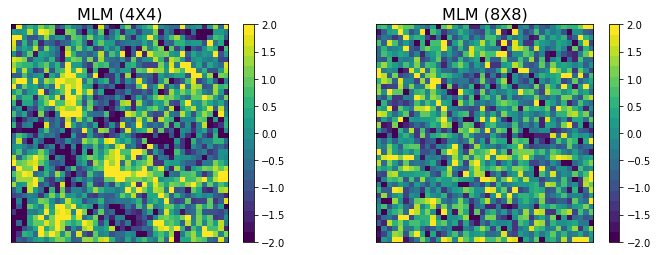

In [57]:
plot_2s([np.array(mlm_resid)[:,2], np.array(mlm_resid_s)[:,2]],['MLM (4X4)','MLM (8X8)'],vmin=-2,vmax=2)
plt.savefig('MLM res.png',dpi=300)